# Autor:


*   Bruno Santome Antolín ⏩ 100405889

# Clasificación de pacientes con demencía. 

Importamos el drive y los datos desde el csv. 

In [206]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [208]:
%%R
lib_loc <- "/content/drive/MyDrive/Datos/r-lib"

Recalcar que cargo dos veces los datos, esto no es necesario y se podría simplemente hacer una copia posteriormente. Pero necesito tener dos conjuntos con los mismos datos puesto que un conjunto hare transformaciones para su representación y analisis de correlación. Y el segundo para normalizarlos y buscar un modelo de clasificación apropiado. 

In [209]:
%%R
#Carga datos de un fichero
dfMedidas <- read.csv("/content/drive/MyDrive/AnalisisDatos/Datos/dementia_dataset.csv")


# Descripción de los datos. 
**Datos a trabajar :**

In [210]:
%%R
head(dataset)

        Group Visit MR.Delay M.F Hand Age EDUC SES MMSE CDR eTIV  nWBV   ASF
1 Nondemented     1        0   1    1  87   14   2   27 0.0 1987 0.696 0.883
2 Nondemented     2      457   1    1  88   14   2   30 0.0 2004 0.681 0.876
3    Demented     1        0   1    1  75   12   2   23 0.5 1678 0.736 1.046
4    Demented     2      560   1    1  76   12   2   28 0.5 1738 0.713 1.010
5    Demented     3     1895   1    1  80   12   2   22 0.5 1698 0.701 1.034
6 Nondemented     1        0   0    1  88   18   3   28 0.0 1215 0.710 1.444


In [211]:
%R -o dfMedidas

dfMedidas

,Subject.ID,MRI.ID,Group,Visit,MR.Delay,M.F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
1,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0.0,1987,0.696,0.883
2,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0.0,2004,0.681,0.876
3,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,-2147483648,23,0.5,1678,0.736,1.046
4,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,-2147483648,28,0.5,1738,0.713,1.010
5,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,-2147483648,22,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1,28,0.5,1693,0.694,1.037
370,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1,26,0.5,1688,0.675,1.040
371,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2,30,0.0,1319,0.801,1.331
372,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2,30,0.0,1327,0.796,1.323


Hay un totalde 373 filas y 12 columnas con distintas variables. 

Descripción del significado de cada columna: 

Group: si el paciente tiene demencía, no tiene demencía o esta convertido. 

Visit: El número de visitas que han recibido. 

Mr.delay: monitoring of disease progression using structural and physiological magnetic resonance 

M.F : Si el paciente es hombre o mujer. 

Hand: si son diestros o zurdos

Age: la edad del paciente

EDUC: La eduación de paciente. 

SES: Estado socio ecónomico del paciente

MMSE: es una prueba cognitiva que se utiliza habitualmente como parte de la evaluación de una posible demencia. El MMSE también se utiliza para delinear las diferentes etapas del estado de la enfermedad de demencía, con una puntuación de 20 a 24 que sugiere demencia leve, de 13 a 20 que sugiere demencia moderada y de menos de 12 que indica demencia grave.

CDR:Pérdida de memoria moderada, más marcada para acontecimientos recientes; el defecto interfiere con actividades diarias.

eTIV: The eTIV variable estimates intracranial brain volume

nWBV:  This variable measures the volume of the whole brain

ASF: El ASF es un factor de escala de un parámetro que permite la comparación del volumen intracraneal total estimado (eTIV) en función de las diferencias en la anatomía humana

# Tratamiento de los datos

Empezamos viendo si el conjunto de datos tiene valores nulos. 
No los tiene, asi que seguimos con el tratamiento. 

In [254]:
%%R
sum(is.na(dataset))

[1] 0


Hay diversos trataminentos que realizar para poder usar los datos en un analisis de correlación o en la busqueda de modelos de clasificación. 

In [212]:
%%R
#Cambiamos los valores categoricos: M:1 F:0
dfMedidas$M.F<-ifelse(dfMedidas$M.F=="M",1,0)

Eliminamos las columnas Subject.Id, MRI.ID y Hand porque son uniformes a traves de toda la tabla de datos luego no nos proporcionan información para conseguir clasificar a pacientes con demencía (sin demecía o convertidos). 



In [213]:
%%R
## 
dfMedidas <- dfMedidas[,!names(dfMedidas) %in% c("Subject.ID", "MRI.ID","Hand")]



Vemos que hay valores nulos a lo largo de los datos. 
Concretamente estan en la columna de SES Y en la columna de MMSE.
==> 19 datos NA en SES
==> 2 datos NA en MMSE 

21 en total. 
Hay que tratarlos. 

In [214]:

%%R
sum(is.na(dfMedidas))

[1] 21


In [215]:
%%R
mean(dfMedidas$SES, na.rm = TRUE)
#La media es 2,46. Vamos a redondear. Puesto que no se les puede asignar este valor decimal. 

[1] 2.460452


In [216]:
%%R
mean(dfMedidas$MMSE, na.rm = TRUE)
#Vamos a redondear. Puesto que no se les puede asignar este valor decimal. 

[1] 27.34232


Para tratarlos vamos a sustituir dichos valores NA con valores de la media de la columna donde se encuentren. 
Al tener estas columnas (SES, MMSE) únicamente valores reales tenemos que redondear dicha media. 

In [217]:
%%R
dfMedidas$SES[is.na(dfMedidas$SES)] <- round(mean(dfMedidas$SES, na.rm = TRUE))
dfMedidas$MMSE[is.na(dfMedidas$MMSE)] <- round(mean(dfMedidas$MMSE, na.rm = TRUE))

In [218]:
%%R
if (!require("psych", lib.loc = lib_loc)) install.packages("psych", lib = lib_loc)
library(psych, lib.loc = lib_loc)

describe(dfMedidas)

         vars   n    mean     sd  median trimmed    mad     min     max   range
Group*      1 373    2.41   0.66    3.00    2.51   0.00    1.00    3.00    2.00
Visit       2 373    1.88   0.92    2.00    1.76   1.48    1.00    5.00    4.00
MR.Delay    3 373  595.10 635.49  552.00  503.68 818.40    0.00 2639.00 2639.00
M.F         4 373    0.43   0.50    0.00    0.41   0.00    0.00    1.00    1.00
Age         5 373   77.01   7.64   77.00   76.90   7.41   60.00   98.00   38.00
EDUC        6 373   14.60   2.88   15.00   14.58   4.45    6.00   23.00   17.00
SES         7 373    2.44   1.11    2.00    2.40   1.48    1.00    5.00    4.00
MMSE        8 373   27.34   3.67   29.00   28.11   1.48    4.00   30.00   26.00
CDR         9 373    0.29   0.37    0.00    0.23   0.00    0.00    2.00    2.00
eTIV       10 373 1488.13 176.14 1470.00 1478.77 173.46 1106.00 2004.00  898.00
nWBV       11 373    0.73   0.04    0.73    0.73   0.04    0.64    0.84    0.19
ASF        12 373    1.20   0.14    1.19

Podemos sacar alguna conclusión sobre los datos gracias a su
descripción. Por ejemplo que todos los pacientes tienen un rango de edad de entre 60 y 98 años. 


In [219]:
%%R
summary(dfMedidas$Group)

   Length     Class      Mode 
      373 character character 


Hacemos una copia de nuestro conjunto. 
Esta copia llamada dataset la usaremos más adelante para encontrar un modelo de clasificación.

In [220]:
%%R
dataset <- dfMedidas

Esto es muy importante para la representación y el analisis de correlación: cambiar el atributo categorico de grupo a un atributo numérico. 

Con lo siguiente: 

Demented:      3 

Nondemented:   2 

Converted:     1


In [221]:
%%R

val_fact = factor(dfMedidas$Group)
df <- unclass(val_fact)
dfMedidas$Group = as.integer(df)


Importante tambien pasar el grupo a factorial. 

In [222]:
%%R 
dataset$Group <-as.factor(dataset$Group)

In [223]:
%%R
summary(dataset$Group)

  Converted    Demented Nondemented 
         37         146         190 


Como vemos hay un total de: 

190 pacientes sin demencía

146 pacientes con demencía

37 que han sido convertidos. 

In [224]:
%%R
head(dataset)

        Group Visit MR.Delay M.F Age EDUC SES MMSE CDR eTIV  nWBV   ASF
1 Nondemented     1        0   1  87   14   2   27 0.0 1987 0.696 0.883
2 Nondemented     2      457   1  88   14   2   30 0.0 2004 0.681 0.876
3    Demented     1        0   1  75   12   2   23 0.5 1678 0.736 1.046
4    Demented     2      560   1  76   12   2   28 0.5 1738 0.713 1.010
5    Demented     3     1895   1  80   12   2   22 0.5 1698 0.701 1.034
6 Nondemented     1        0   0  88   18   3   28 0.0 1215 0.710 1.444


# Representación de datos. 

Vamos a representar algunos datos para entenderlos mejor. 

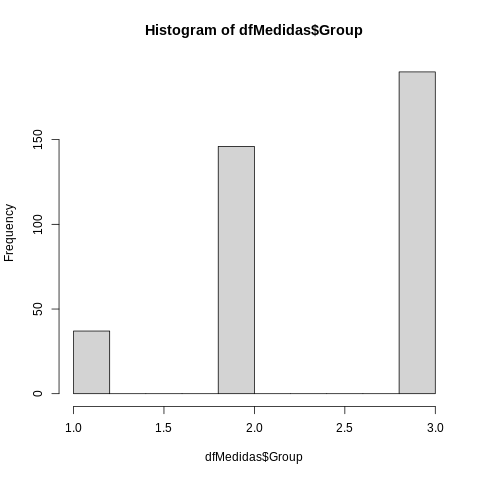

In [225]:
%%R
#Podemos ver graficamente las cantidad de clase, como visto anteriormente hay más pacientes sin demencía que con. 
hist(dfMedidas$Group)

En el caso del CDR como hemos visto significa la perdida de memoría en activididades recientes. 

Podemos ver que al rededor de 205 pacientes no pierden memoría, unos 125 pacientes han perdido algo de memoría a corto plazo y poco menos de 45 pacientes tienen una perdida total de memoría a corto plazo.

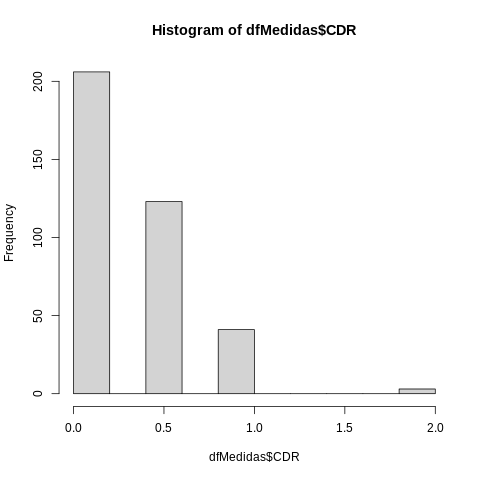

In [251]:
%%R
hist(dfMedidas$CDR)

El MMSE categoriza los niveles de demencía.
De 20 a 24 que sugiere demencia leve, de 13 a 20 que sugiere demencia moderada y de menos de 12 que indica demencia grave.

vemos que la mayoría de pacientes tienen un MMSE por encima de 25 luego no tienen demencía ( Logico si hay 190 sin demencía y 37 convertidos). Sin embargo hay unos cuantos que si que tienen MMSE por debajo de 24 de hecho podríamos decir que hay al rededor de 50 pacientes con cierto nivel de demencía. Destacan los dos pacientes con demencía severa con un MMSE con valores inferiores a 10. 

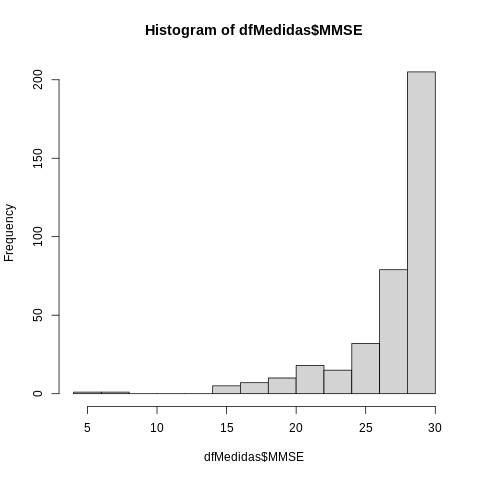

In [252]:
%%R
hist(dfMedidas$MMSE)

Vemos que hay una mayoría de mujeres entre los apcientes, con aproximadamente 210 mujeres y 160 hombres. 

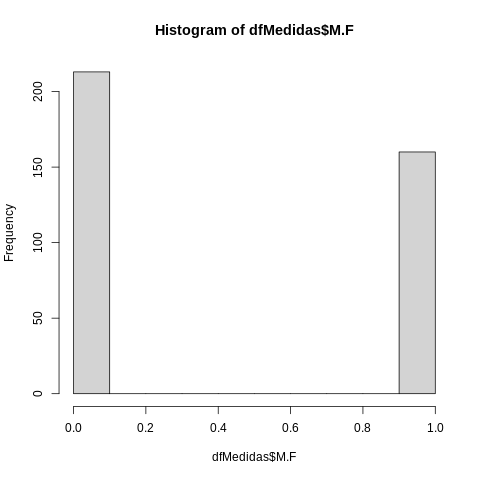

In [253]:
%%R

hist(dfMedidas$M.F)

El grafico inferior nos dice que aun que haya una minoría de hombres, hay una mayor propoción de hombres con demencía que mujeres con demencía. Igual para los pacientes no dementes y convertidos. 
Podría esto indicar que los hombres tienen más tendencía a tener demencía. Pero no podemos estar seguros. 

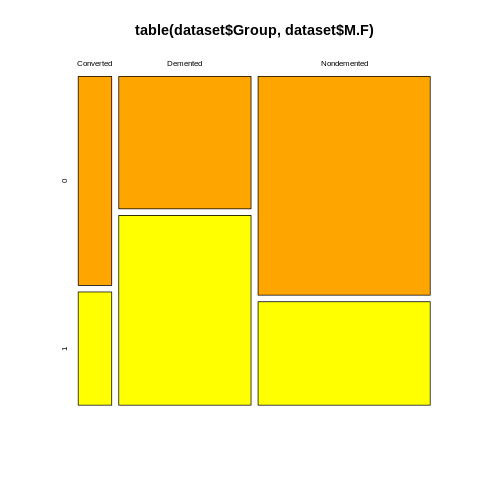

In [226]:
%%R
mosaicplot(table(dataset$Group, dataset$M.F), color=c("orange", "yellow"))

# Estudio de correlación.
Para estudiar la correlación entre las variables. 

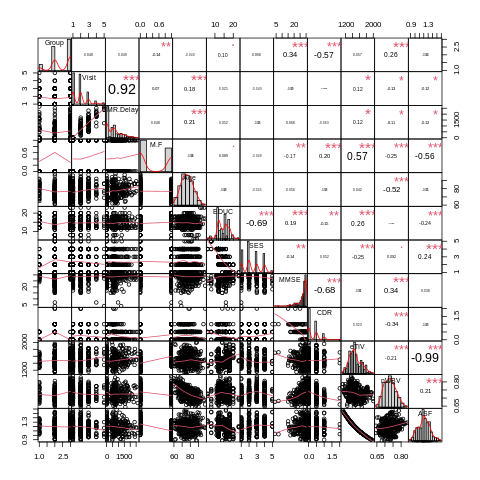

In [228]:
%%R
if (!require("zoo", lib.loc = lib_loc)) install.packages("zoo", lib = lib_loc)
if (!require("xts", lib.loc = lib_loc)) install.packages("xts", lib = lib_loc)
if (!require("PerformanceAnalytics", lib.loc = lib_loc)) install.packages("PerformanceAnalytics", lib = lib_loc)
library(PerformanceAnalytics, lib.loc = lib_loc)
chart.Correlation(dfMedidas[,c("Group","Visit", "MR.Delay", "M.F","Age","EDUC","SES","MMSE","CDR","eTIV","nWBV","ASF")])

In [229]:
%%R
cor(dfMedidas)

               Group        Visit    MR.Delay         M.F         Age
Group     1.00000000  0.048434343  0.04926187 -0.14391843 -0.04926748
Visit     0.04843434  1.000000000  0.92000903  0.06979146  0.18321293
MR.Delay  0.04926187  0.920009030  1.00000000  0.04800583  0.20535745
M.F      -0.14391843  0.069791458  0.04800583  1.00000000 -0.03772645
Age      -0.04926748  0.183212928  0.20535745 -0.03772645  1.00000000
EDUC      0.10060608  0.024614786  0.05162991  0.08927920 -0.02788583
SES       0.06615438 -0.049293616 -0.02624703 -0.04850362 -0.04541035
MMSE      0.34020758 -0.029354949  0.06560447 -0.16608398  0.05567213
CDR      -0.57251796  0.002324756 -0.06291507  0.20213994 -0.02625680
eTIV      0.05669320  0.117428077  0.11962370  0.57254894  0.04234842
nWBV      0.25809297 -0.126682339 -0.10558642 -0.24961802 -0.51835921
ASF      -0.04284798 -0.120398998 -0.12354451 -0.56164740 -0.03506672
                EDUC         SES        MMSE          CDR        eTIV
Group     0.10060608

In [230]:
%%R
if (!require("mvtnorm", lib.loc = lib_loc)) install.packages("mvtnorm", lib = lib_loc)
if (!require("polycor", lib.loc = lib_loc)) install.packages("polycor", lib = lib_loc)
library(polycor, lib.loc = lib_loc)

correl <- hetcor(dataset)
sort(correl$correlations[,1])

        CDR         M.F         Age         ASF       Visit         SES 
-0.59415569 -0.17300079 -0.05229004 -0.04952367  0.06375756  0.06427166 
       eTIV    MR.Delay        EDUC        nWBV        MMSE       Group 
 0.06566252  0.06755597  0.12648937  0.31177309  0.36315474  1.00000000 


Vemos que el CDR y el MMSE tienen bastante relación con el grupo. Esto tiene sentido ya que el CDR que es la perdida de memoría moderada a corto plazo y el MMSE es el test que determina la severidad de la enfermedad. 

En general vemos que cada variable se relaciona medianamente con otra. 

Podemos observar en la grafica inferior que hay una fuerte relación lineal entre los atributos ASF y eTIV. 

Muy lógico ya que como hemos explicado antes el ASF es un factor de escala de un parámetro que permite la comparación del volumen intracraneal total estimado (eTIV) en función de las diferencias en la anatomía humana. 

`geom_smooth()` using formula = 'y ~ x'


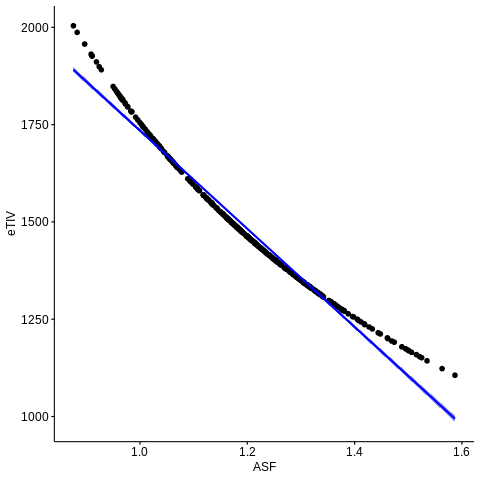

In [231]:
%%R
if (!require("ggpubr", lib.loc = lib_loc)) install.packages("ggpubr", lib = lib_loc)
library(ggpubr, lib.loc = lib_loc)
ggscatter(dfMedidas, x = "ASF", y= "eTIV",
          add = "reg.line",                                 # Add regression line
          conf.int = TRUE,                                  # Add confidence interval
          add.params = list(color = "blue",
                          ill = "lightgray")
)

#Podemos observar que hay una fuerte relación lineal entre los atributos ASF y eTIV

Observando los datos, vemos que hay algunas variables más relacionadas entre ellas que otras como pueden ser ASF y eTIV. 
Con la variable de grupo destacan la relación con la variable CDR  asi como más ligeramente MMSE & nWBV. 

En general todas las variables están ligeramente relacionadas entre ellas, no podemos eliminar ninguna variable más del dataset para realizar la clasificación. Tampoco considero necesario aplicar PCA para hacer una slección de atributos más importantes. Asi que vamos  a pasar directamente a la busqueda de un modelo de clasificación. 

# Naive Bayes.
Empezamos con la prueba del modelo Naive bayes sobre el conjunto de datos. 


In [233]:
%%R
if (!require("caTools", lib.loc = lib_loc)) install.packages("caTools", lib = lib_loc)
library(caTools, lib.loc = lib_loc)
 
atributos <- c("Group","Visit", "MR.Delay","M.F","Age","EDUC","SES","MMSE","CDR","eTIV","nWBV","ASF")

set.seed(1)
sample <- sample.split(dataset$Group, SplitRatio = .7)
setEntrena <- subset(dataset[, atributos], sample == TRUE)
setTest    <- subset(dataset[, atributos], sample == FALSE)

print(summary(setEntrena$Group))
print(round(summary(setEntrena$Group)/nrow(setEntrena),2))

  Converted    Demented Nondemented 
         26         102         133 
  Converted    Demented Nondemented 
       0.10        0.39        0.51 


Podemos ver la probabilidad de pertencer a cada clase en el set de entrenamiento y en el de Test. 

In [234]:
%%R
print(summary(setTest$Group))
print(round(summary(setTest$Group)/nrow(setEntrena),2))

  Converted    Demented Nondemented 
         11          44          57 
  Converted    Demented Nondemented 
       0.04        0.17        0.22 


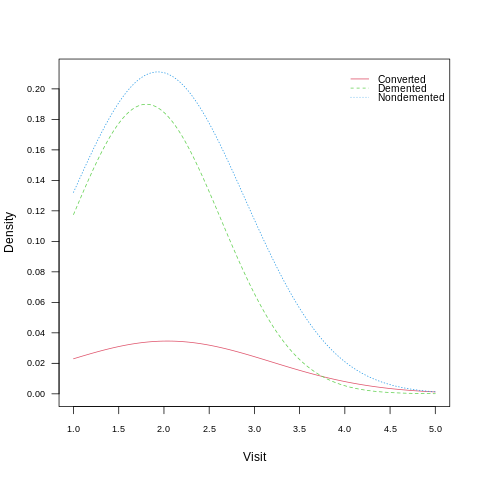

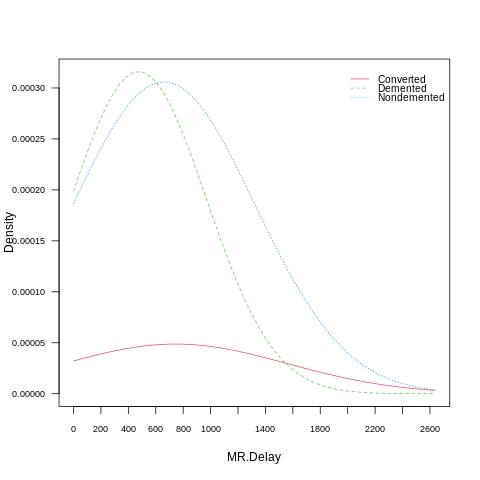

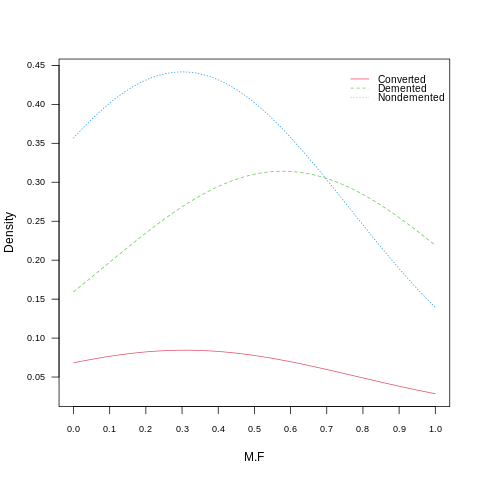

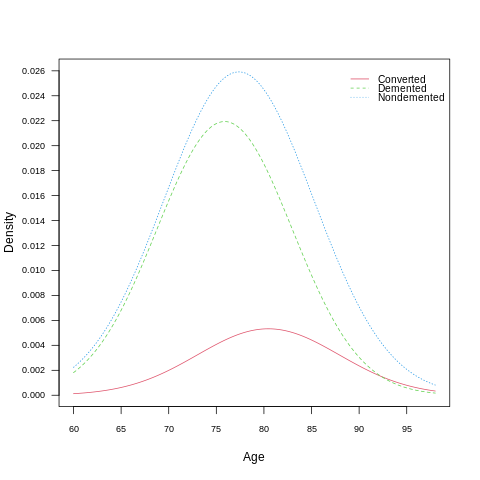

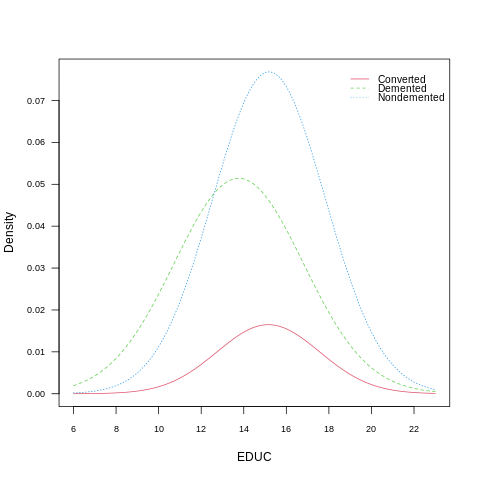

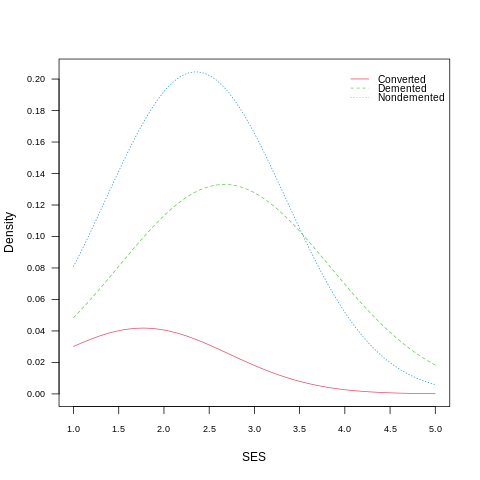

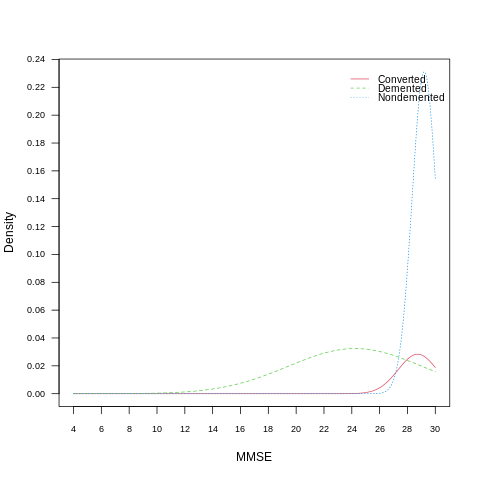

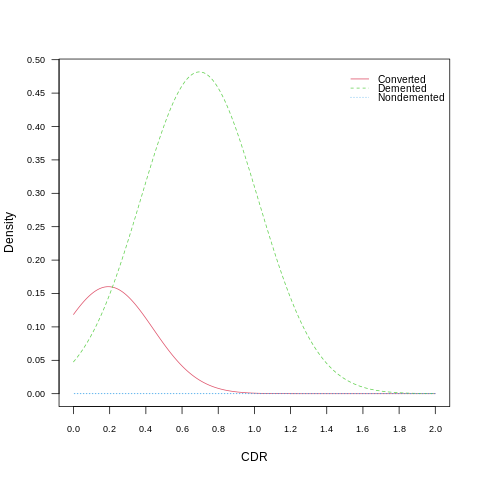

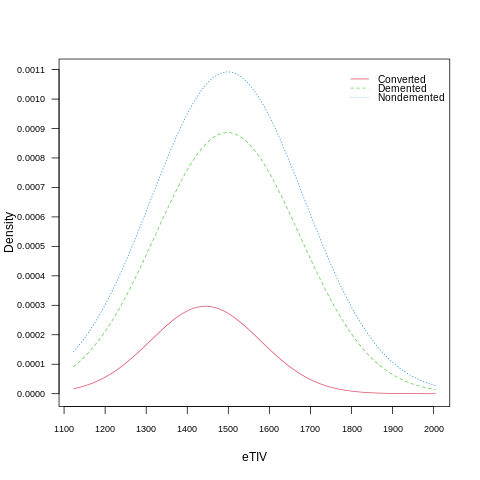

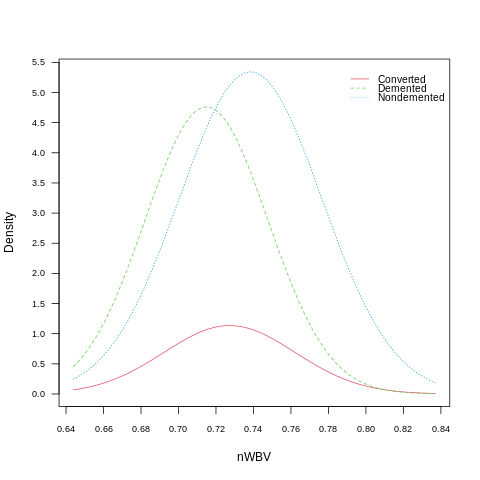

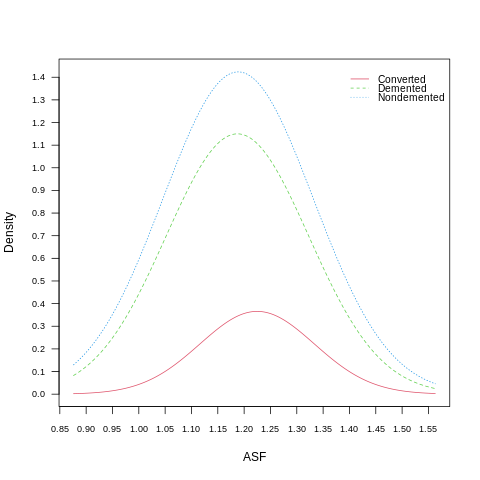

In [235]:
%%R
if (!require("naivebayes", lib.loc = lib_loc)) install.packages("naivebayes", lib = lib_loc)
library(naivebayes, lib.loc = lib_loc)

modelo.nb <- naive_bayes(Group ~ Visit+ MR.Delay + M.F + Age + EDUC + SES + MMSE + CDR + eTIV + nWBV +ASF, data = setEntrena)
modelo.nb$tables
plot(modelo.nb)

En general podemos que las clases no se separan. 

Para poder calcular la matriz de confusión es necesario determinar la predicción del modelo sobre el conjunto de test.

Para realizar una predicción, por ejemplo, para la primera instancia del conjunto de test, se puede usar:

In [236]:
%%R
print(setTest[1,])
print(predict(modelo.nb, setTest[1,], type = "prob"))

     Group Visit MR.Delay M.F Age EDUC SES MMSE CDR eTIV  nWBV   ASF
3 Demented     1        0   1  75   12   2   23 0.5 1678 0.736 1.046
        Converted  Demented  Nondemented
[1,] 7.526507e-06 0.9999925 2.536724e-14


Como vemos nos salen las probabilidades de pertencer a cada clase según los datos. En ese caso le ha asignado la clase Demented. 

Vamos a ver la matriz de confusión de este modelo.

In [237]:
%%R
if (!require("caret", lib.loc = lib_loc)) install.packages("caret", lib = lib_loc)
if (!require("e1071", lib.loc = lib_loc)) install.packages("e1071", lib = lib_loc)

library(caret, lib.loc = lib_loc)

predice.modelo.nb <- predict(modelo.nb,  newdata = setTest, type = "class")
c <- confusionMatrix(predice.modelo.nb, setTest$Group)

print(c)

Confusion Matrix and Statistics

             Reference
Prediction    Converted Demented Nondemented
  Converted           2        3           0
  Demented            7       41           2
  Nondemented         2        0          55

Overall Statistics
                                          
               Accuracy : 0.875           
                 95% CI : (0.7992, 0.9299)
    No Information Rate : 0.5089          
    P-Value [Acc > NIR] : 2.382e-16       
                                          
                  Kappa : 0.7773          
                                          
 Mcnemar's Test P-Value : 0.1328          

Statistics by Class:

                     Class: Converted Class: Demented Class: Nondemented
Sensitivity                   0.18182          0.9318             0.9649
Specificity                   0.97030          0.8676             0.9636
Pos Pred Value                0.40000          0.8200             0.9649
Neg Pred Value                0.91589     

A primera vista no tiene mala pinta, la precisión llega a ser del 0.875, con un 95% de confianza. Vemos tambien que la precisión balanceada de clada clase es muy alta para los pacientes sin demencía(0.9643) y para los pacientes con demencía(0.8997) Sin embargo para el grupo Converted, la precisión es muy cercana a 0.5 lo que indica una precisión cercana a probabilidad aleatoría. 

De todas formas nos interesa más poder clasificar bien los Demented y los Nondemented. 

Viendo la matriz de confusión clasifica correctamente casi todos los pacientes sin demencía ( salvo 2) que los clasifica como dementes (hay que intentar evitar estos falsos positivos). Tambien clasifica a 3 pacientes como convertidos cuando deberían estar en la categoría dementes. 

Vamos a probar otros modelos. 

# Redes Bayesanas
Antes de aplicar el modelo, establecemos nuestros conjuntos de entrenamiento y Test. 
Obtenemos la red que representa bastante claramente la relación existente entre las variables.

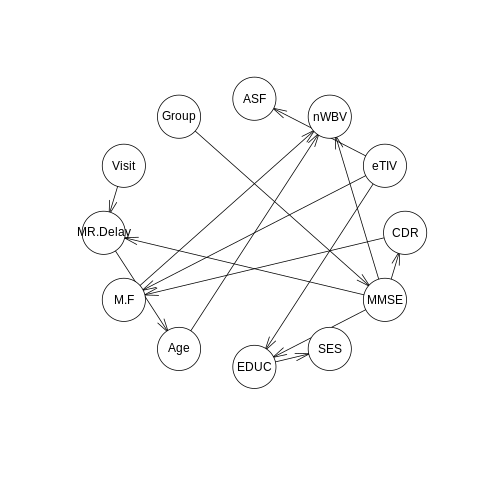

In [240]:
%%R
#dataset$SES[is.na(dataset$SES)] <-  round(mean(dataset$SES, na.rm = TRUE))
if (!require("bnlearn", lib.loc = lib_loc)) install.packages("bnlearn", lib = lib_loc)
if (!require("dplyr", lib.loc = lib_loc)) install.packages("dplyr", lib = lib_loc)
library(dplyr, lib.loc = lib_loc)
library(bnlearn, lib.loc = lib_loc)

setEntrena_d <- setEntrena %>% mutate_if(is.integer, as.double) #no pueden usarse atributos enteros

red.bn <- tabu(setEntrena_d, optimized = FALSE, perturb = 5, tabu = 20,
             score = "bic-cg") #obtener la red
modelo.bn <- bn.fit(red.bn, setEntrena_d) #obtener parámetros
plot(red.bn)

Como vemos podemos ver como hemos dicho anteriormente que cada variable esta relacionada con otra de cierta forma sin conocer la causalidad. 

De la red podemos ver que el grupo esta principalmente relacionado con el test MMSE y ese mismo con el CDR. 
El nivel de educación esta estrictamente relacionado con el nivel socio economico (SES)

Curiosamente la edad y el sexo ademas del test MMSE se relacionan con la variable que mide el volumen del cerebro. 



    Attribute Accuracy
1 * CDR       90.04%  
2   MMSE      66.67%  
3   nWBV      58.62%  
4   M.F       58.24%  
5   EDUC      55.56%  
6   SES       53.64%  
7   ASF       52.11%  
8   Visit     50.96%  
8   MR.Delay  50.96%  
8   Age       50.96%  
8   eTIV      50.96%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'


Call:
OneR.formula(formula = Group ~ ., data = setEntrena, verbose = TRUE)

Rules:
If CDR = 0   then Group = Nondemented
If CDR = 0.5 then Group = Demented
If CDR = 1   then Group = Demented
If CDR = 2   then Group = Demented

Accuracy:
235 of 261 instances classified correctly (90.04%)

Contingency table:
             CDR
Group             0  0.5    1   2 Sum
  Converted      16   10    0   0  26
  Demented        0 * 68 * 31 * 3 102
  Nondemented * 133    0    0   0 133
  Sum           149   78   31   3 261
---
Maximum in each column: '*'

Pearson's Chi-squared test:
X-squared = 240.78, df = 6, p-value < 2.2e-16

Confusion Matrix and Sta

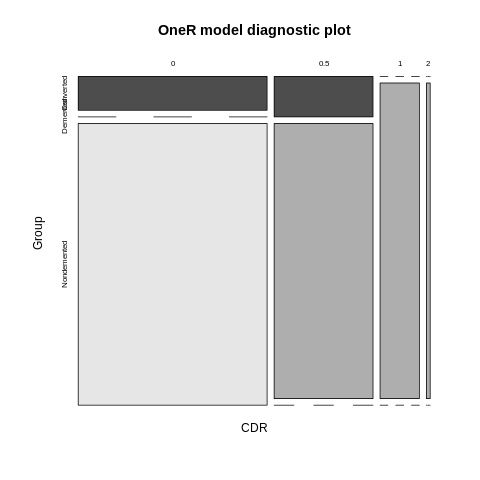

In [241]:
%%R
#Usar OneRule para tener el clasificador más simple.
if (!require("OneR", lib.loc = lib_loc)) install.packages("OneR", lib = lib_loc)
library(OneR, lib.loc = lib_loc)

set.seed(2)
model_OneR <- OneR(Group ~., setEntrena, verbose = TRUE)
summary(model_OneR)
plot(model_OneR)
predice.modelo.OneR <- predict(model_OneR, setTest)

print(confusionMatrix(predice.modelo.OneR, setTest$Group))

Este modelo tiene un porcentaje de precisión mejor (0.8839) que el de Naive Bayes. Como hemos visto La variable que usa el modelo para ver a que clase pertenece cada datos es el CDR, ya que tiene un 90% de precisión. 

Clasifica los dementes sin error y los no-dementes sin practicamente error (sigue clasificando a 2 pacientes dementes como no dementes, lo cual es un error grave). Sin embargo no predice correctamente los convertidos con un 100% de error. 



#Random Forest
Probamos el random Forest. 

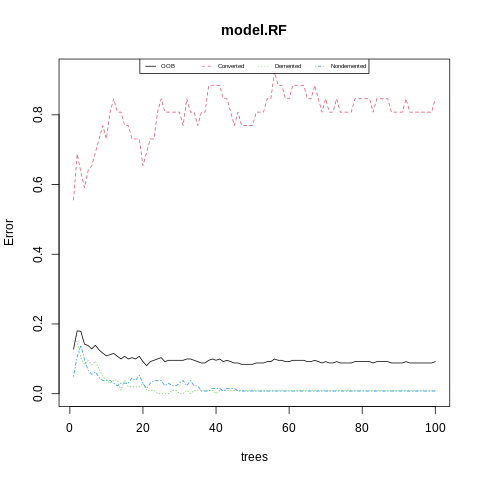

In [256]:
%%R
if (!require("randomForest", lib.loc = lib_loc)) install.packages("randomForest", lib = lib_loc)
library(randomForest, lib.loc = lib_loc)

set.seed(1)
model.RF <- randomForest(Group ~ Visit+ MR.Delay + M.F + Age + EDUC + SES + MMSE + CDR + eTIV + nWBV +ASF,
                         data = setEntrena, ntree = 100, importance = TRUE)
plot(model.RF)
model.RF.leyenda <- if (is.null(model.RF$test$err.rate)) {colnames(model.RF$err.rate)} 
                    else {colnames(model.RF$test$err.rate)}
legend("top", cex =0.5, legend = model.RF.leyenda, lty=c(1,2,3,4), col=c(1,2,3,4), horiz = TRUE)


Vemos en la grafica superior, que el error de clasificación en el conjunto de test en muy pequeño para las clases Demented y nonDemented. Pero tiene un error altisimo para la clase Converted. 

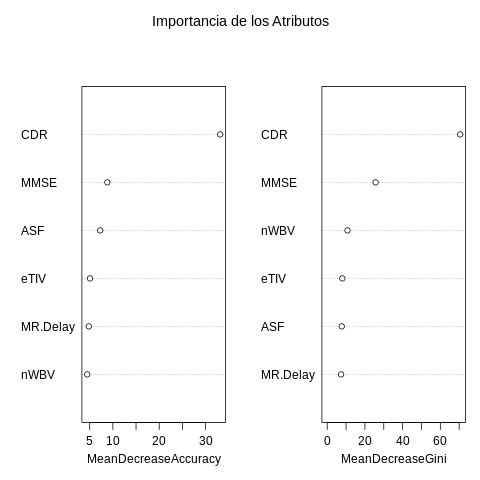

In [244]:
%%R
varImpPlot(model.RF, sort = TRUE, main = "Importancia de los Atributos", n.var = 6)

Confirmamos la importancía de los atributos, como hemos dicho el CDR es el atributo más relevante. 

In [245]:
%%R

predice.model.RF <- predict(model.RF,  newdata = setTest, type = "class")
c <- confusionMatrix(predice.model.RF, setTest$Group)

print(c)

Confusion Matrix and Statistics

             Reference
Prediction    Converted Demented Nondemented
  Converted           1        0           0
  Demented            8       44           2
  Nondemented         2        0          55

Overall Statistics
                                          
               Accuracy : 0.8929          
                 95% CI : (0.8203, 0.9434)
    No Information Rate : 0.5089          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8054          
                                          
 Mcnemar's Test P-Value : 0.007383        

Statistics by Class:

                     Class: Converted Class: Demented Class: Nondemented
Sensitivity                  0.090909          1.0000             0.9649
Specificity                  1.000000          0.8529             0.9636
Pos Pred Value               1.000000          0.8148             0.9649
Neg Pred Value               0.909910     

El modelo del Random Forest ha mejorado más aun con una precisión de 0.8929. La precisión balanceada de las clases Demented y nonDemented ha subido tambien. 
En la matriz de confusión vemos que clasifica los dementes sin problema, pero una vez más clasifica a dos pacientes sin demencía como dementes. 
Al ser el error de clasificación tan alto en la clase Converted, hay un nivel elevado de errores. 

#AdaBoost

 [1] 1.1450032 0.8055565 0.8892367 0.9276471 0.7918568 0.6819472 0.6907685
 [8] 0.8666763 0.7903613 0.9971917
       Age        ASF        CDR       EDUC       eTIV        M.F       MMSE 
 7.1387769  0.3930236 50.5149487  1.1976564  7.9282946  1.0334836  4.6453534 
  MR.Delay       nWBV        SES      Visit 
14.0825594  8.9215542  4.1443491  0.0000000 


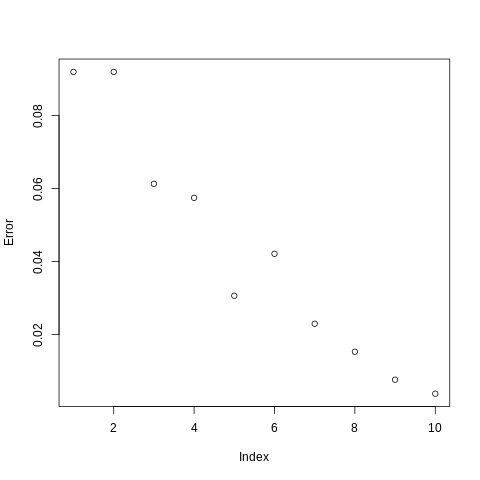

In [246]:
%%R
if (!require("foreach", lib.loc = lib_loc)) install.packages("foreach", lib = lib_loc)
if (!require("iterators", lib.loc = lib_loc)) install.packages("iterators", lib = lib_loc)
if (!require("doParallel", lib.loc = lib_loc)) install.packages("doParallel", lib = lib_loc)
if (!require("adabag", lib.loc = lib_loc)) install.packages("adabag", lib = lib_loc)
library(adabag, lib.loc = lib_loc)

set.seed(1)
model.adaboost <- boosting(Group ~ Visit+ MR.Delay + M.F + Age + EDUC + SES + MMSE + CDR + eTIV + nWBV +ASF, 
                           data = setEntrena, boos = TRUE, mfinal = 10, #10 árboles
                           coeflearn = "Breiman")

print(model.adaboost$weights) #el peso de cada clasificador
print(model.adaboost$importance) #la importancia de cada atributo
plot(errorevol(model.adaboost,setEntrena)$error, ylab = "Error") #mostrar el error

In [247]:
%%R
predice.model.adaboost <- predict(model.adaboost, setTest)
confusionMatrix(as.factor(predice.model.adaboost$class), setTest$Group)

Confusion Matrix and Statistics

             Reference
Prediction    Converted Demented Nondemented
  Converted           2        0           2
  Demented            7       44           2
  Nondemented         2        0          53

Overall Statistics
                                          
               Accuracy : 0.8839          
                 95% CI : (0.8097, 0.9367)
    No Information Rate : 0.5089          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.793           
                                          
 Mcnemar's Test P-Value : 0.02929         

Statistics by Class:

                     Class: Converted Class: Demented Class: Nondemented
Sensitivity                   0.18182          1.0000             0.9298
Specificity                   0.98020          0.8676             0.9636
Pos Pred Value                0.50000          0.8302             0.9636
Neg Pred Value                0.91667     

El modelo AdaBoost nos proporciona tambien una buena precisión.  Sin embargo clasifica mal esta vez a 4 pacientes sin demencía. luego el procentaje de precisión de la clase Non demented es más bajo que las otras clases. Aumenta sin embargo ligeramente la precisión de la clase converted. 

# SVM

In [248]:
%%R
if (!require("e1071", lib.loc = lib_loc)) install.packages("e1071", lib = lib_loc)
library(e1071, lib.loc = lib_loc)

# Se convierte la variable respuesta a factor
# Para que la función svm() calcule el Support Vector Classifier,
# se tiene que indicar que la función kernel es lineal.
model.svm <- svm(formula = Group ~ Visit+ MR.Delay + M.F + Age + EDUC + SES + MMSE + CDR + eTIV + nWBV +ASF,
                  data = setEntrena, 
                  type = 'C-classification',
                  kernel = "linear"
                  )
predice.modelo.svm <- predict(model.svm, setTest)
confusionMatrix(predice.modelo.svm, setTest$Group)

Confusion Matrix and Statistics

             Reference
Prediction    Converted Demented Nondemented
  Converted           1        0           0
  Demented            8       44           2
  Nondemented         2        0          55

Overall Statistics
                                          
               Accuracy : 0.8929          
                 95% CI : (0.8203, 0.9434)
    No Information Rate : 0.5089          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8054          
                                          
 Mcnemar's Test P-Value : 0.007383        

Statistics by Class:

                     Class: Converted Class: Demented Class: Nondemented
Sensitivity                  0.090909          1.0000             0.9649
Specificity                  1.000000          0.8529             0.9636
Pos Pred Value               1.000000          0.8148             0.9649
Neg Pred Value               0.909910     

El resultado de aplicar maquinas de soporte vectorial nos resulta en exactamente los mismos resultados que los obtenidos en el modelo RandomForest. 


In [249]:
%%R
print(setTest[1,])

print(predict(model.svm, setTest[1,]))

     Group Visit MR.Delay M.F Age EDUC SES MMSE CDR eTIV  nWBV   ASF
3 Demented     1        0   1  75   12   2   23 0.5 1678 0.736 1.046
       3 
Demented 
Levels: Converted Demented Nondemented


# Conclusiones.

Considero que la aplicación en la vida real de estos modelos es mejor conseguir clasificar bien a los pacientes con demencía y los no dementes más que conseguir clasificar a los convertidos. 
Luego podemos decir que conseguimos obtener varios modelos con un buen porcentaje de precisión en la clasifiación. Los mejores vienen a ser el modelo Random Forest y el modelo SVM con una precisión de 0.8929 global. Conseguimos en estos modelos una sensibilidad del 100% en la clase demented y del 96,4% en la clase non demented 

Sin embargo hay una mala clasificación de la clase Converted de parte de todos los modelos, donde la precisión llega a ser un poco superior a la completa aleatorización(0.545). Esto se podría arreglar con más datos en la base de datos. Ya que para el modelo en el set de entrenamiento hay únicamente 26 datos de converted. 

Hemos visto que en general la variable más importante en el dataset para predecir la categoría de clase de un nuevo dato viene a ser el CDR que es la perdida de memoría a corto plazo que llega a interferir con actividades diarías. 


Luego en general, conseguimos clasificar bien. Pero podriamos conseguir mejores resultados con una mayor cantidad de datos. 

